sources

https://scikit-learn.org/stable/modules/svm.html
https://levelup.gitconnected.com/text-cleansing-in-nlp-tasks-594b93d648d6
https://medium.com/analytics-vidhya/comprehensive-hands-on-guide-to-twitter-sentiment-analysis-with-dataset-and-code-960c055ada3f
https://www.kaggle.com/datasets/kazanova/sentiment140
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners?scriptVersionId=68181216
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,form%2C%20which%20is%20called%20Lemma.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://takelab.fer.hr/podium/examples/tfidf_example.html

In [37]:
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import spacy
spacy.load('en_core_web_sm')

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import numpy as np



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
pd. set_option('display.max_rows', 10)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)

In [31]:
sentiment140ProcessedDf = pd.read_csv("sentiment140Lem.csv")
sentiment140ProcessedDf.head()

,sentimentScore,tweet,label,cleanTweet,lemmatizedTweet,unLemNoStops
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",negative,awww thats a bummer you shoulda got david carr of third day to do it wink,awww that bummer shoulda get david carr third day wink,awww thats bummer shoulda got david carr third day wink
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,negative,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,upset can not update facebook texting might cry result school today also blah,upset cant update facebook texting might cry result school today also blah
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,negative,i dived many times for the ball managed to save the rest go out of bounds,dive many time ball manage save rest bound,dived many times ball managed save rest bounds
3,0,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire,whole body feel itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",negative,no its not behaving at all im mad why am i here because i cant see you all over there,behave mad can not see,behaving mad cant see


In [32]:
sentiment140ProcessedDf.tail()

,sentimentScore,tweet,label,cleanTweet,lemmatizedTweet,unLemNoStops
1599995,1,Just woke up. Having no school is the best feeling ever,positive,just woke up having no school is the best feeling ever,wake school good feel ever,woke school best feeling ever
1599996,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,positive,thewdbcom very cool to hear old walt interviews,thewdbcom cool hear old walt interview,thewdbcom cool hear old walt interviews
1599997,1,Are you ready for your MoJo Makeover? Ask me for details,positive,are you ready for your mojo makeover ask me for details,ready mojo makeover ask detail,ready mojo makeover ask details
1599998,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,positive,happy th birthday to my boo of alll time tupac amaru shakur,happy birthday boo alll time tupac amaru shakur,happy birthday boo alll time tupac amaru shakur
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H,positive,happy charitytuesday,happy charitytuesday,happy charitytuesday


**Insights from the Sentiment 140 training data **

number of sentiment140 positive tweets: 800000
number of sentiment140 negative tweets: 800000


[Text(0.5, 1.0, 'Number of positive and negative tweets in Sentiment140 training data')]

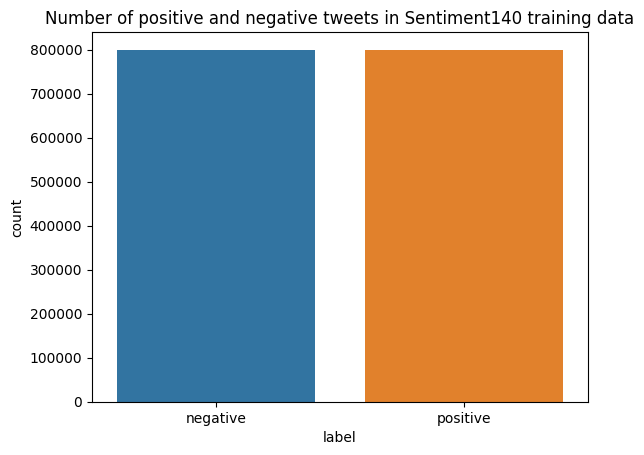

In [6]:
sentiment140Positive = sentiment140ProcessedDf[sentiment140ProcessedDf['label'] == 'positive']
sentiment140Negative = sentiment140ProcessedDf[sentiment140ProcessedDf['label'] == 'negative']
print("number of sentiment140 positive tweets: " + str(sentiment140Positive.shape[0]))
print("number of sentiment140 negative tweets: " + str(sentiment140Negative.shape[0]))
sns.countplot(x=sentiment140ProcessedDf['label'], label= 'count').set(title='Number of positive and negative tweets in Sentiment140 training data')


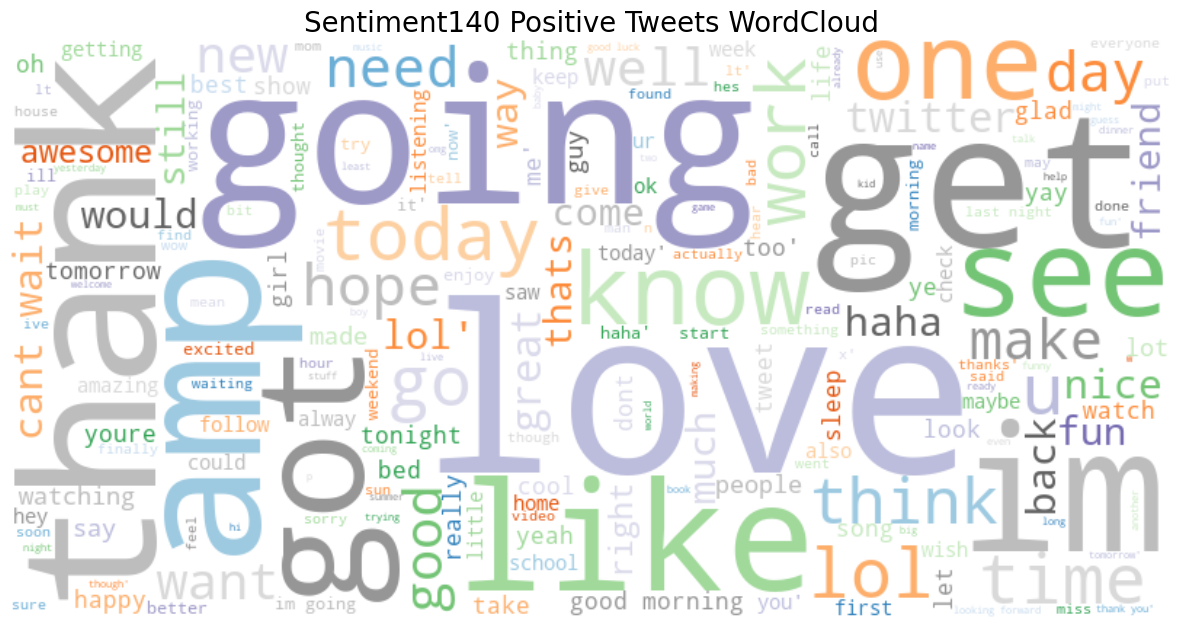

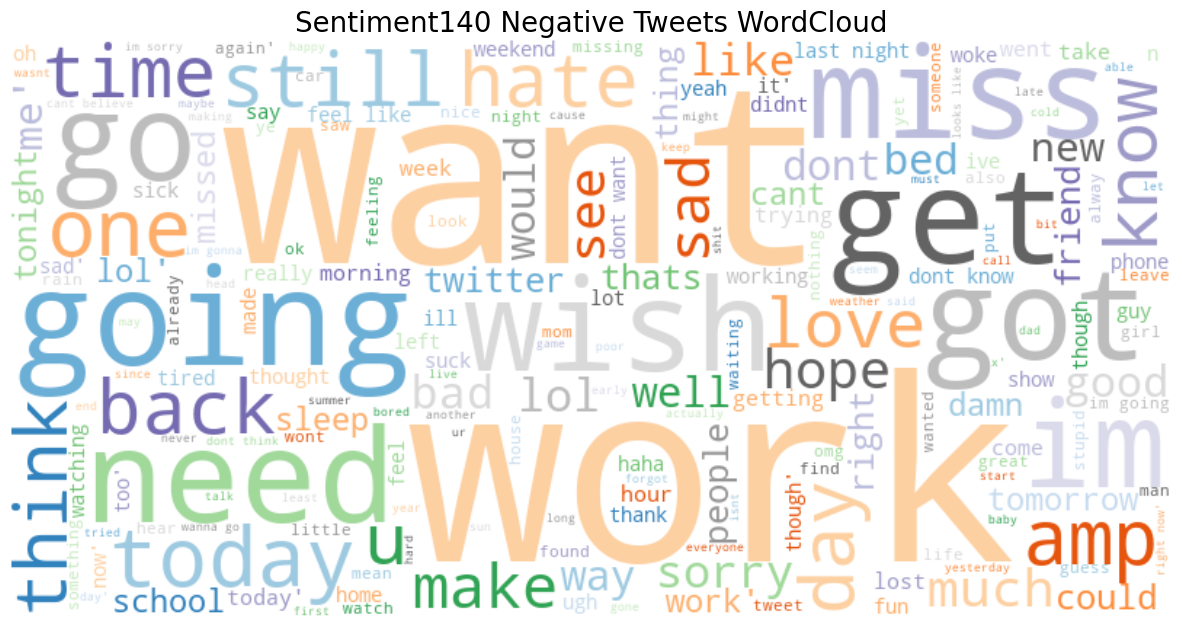

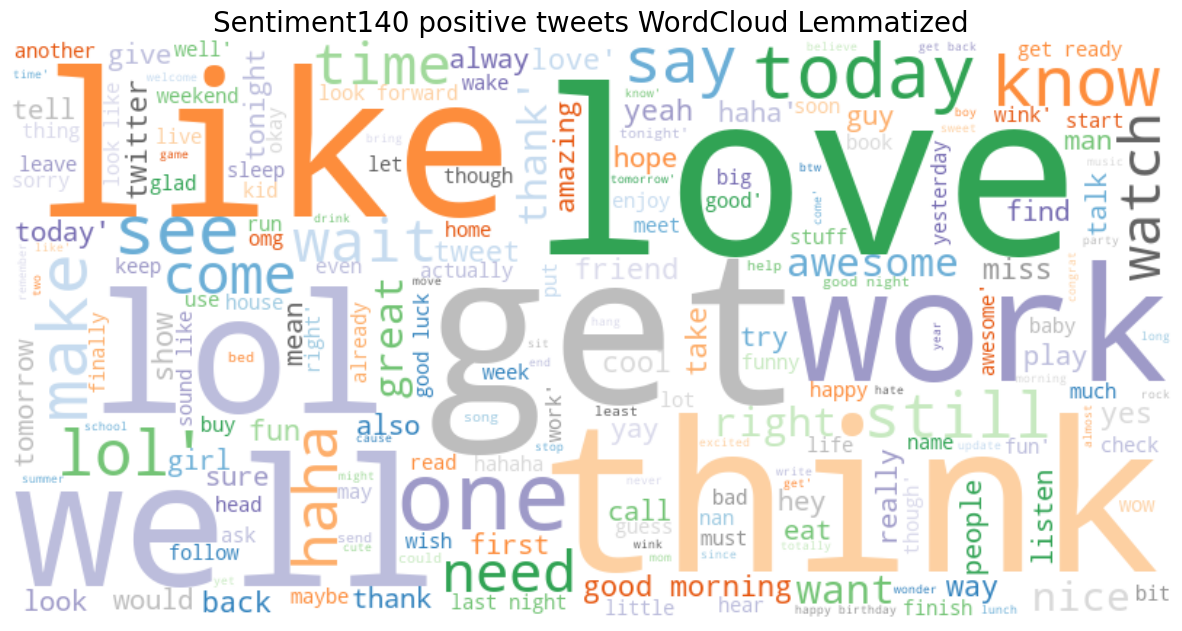

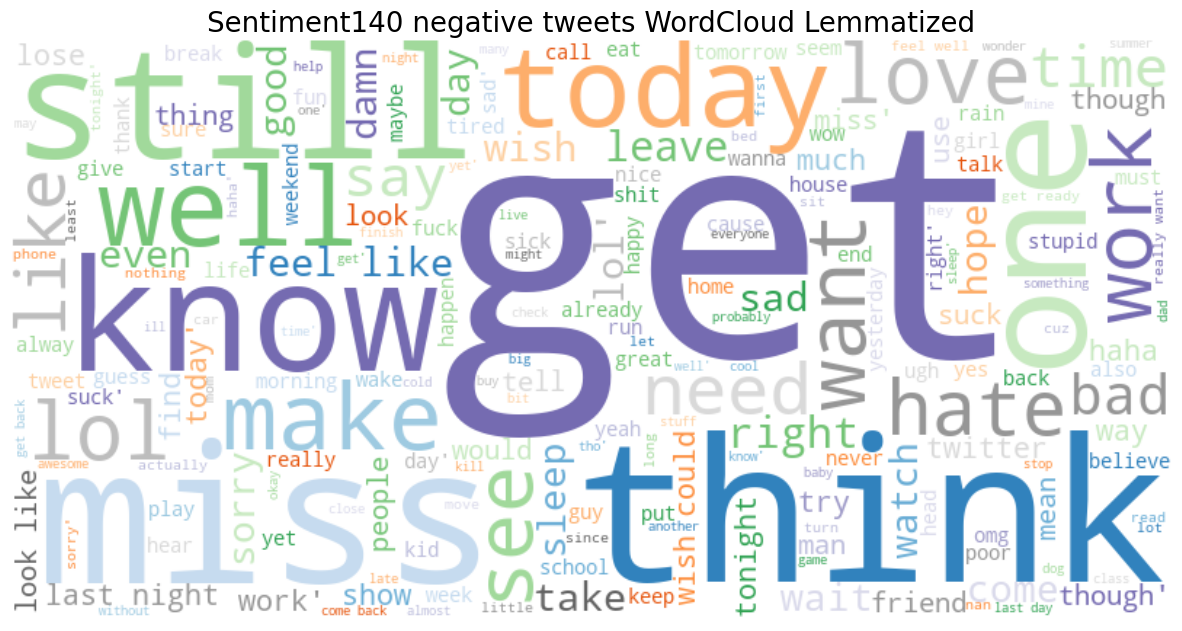

In [7]:
stops = set(stopwords.words('english'))

stops.add("amp")

def tweetsDfToWC(df, dfCollumn, wcTitle, stopwordSet):
    tweets_list = df[dfCollumn].tolist()
    tweets_string = "".join(str(tweets_list))
    wc = WordCloud(width=800, height=400, background_color='white', colormap='tab20c', stopwords=stopwordSet).generate(tweets_string)
    plt.figure(figsize = (15,15))
    plt.title(wcTitle, fontsize = 20)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")

tweetsDfToWC(sentiment140Positive, "cleanTweet", "Sentiment140 Positive Tweets WordCloud", stops)
tweetsDfToWC(sentiment140Negative, "cleanTweet", "Sentiment140 Negative Tweets WordCloud", stops)
tweetsDfToWC(sentiment140Positive, "lemmatizedTweet", "Sentiment140 positive tweets WordCloud Lemmatized", stops)
tweetsDfToWC(sentiment140Negative, "lemmatizedTweet", "Sentiment140 negative tweets WordCloud Lemmatized", stops)


**SVM Model 1**
Creating SVM model, training model

In [8]:
# source: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def evaluateModel(modelName, svcModel, xTest, yTest):
    y_pred = svcModel.predict(xTest)
    print(classification_report(yTest, y_pred))
    cf_matrix = confusion_matrix(yTest, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title (modelName + " Confusion Matrix", fontdict = {'size':18}, pad = 20)

# source: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
def showROCCurve(modelName, svcModel, xTest, yTest):
    Y_pred1 = svcModel.predict(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, Y_pred1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkred', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(modelName + ' ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()


Train:  (1200000,) (1200000,) Test:  ((400000,), (400000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  324881
Data Transformed.
X_train shape:  (1200000, 324881)
X_test shape:  (400000, 324881)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    199581
           1       0.76      0.78      0.77    200419

    accuracy                           0.76    400000
   macro avg       0.76      0.76      0.76    400000
weighted avg       0.76      0.76      0.76    400000



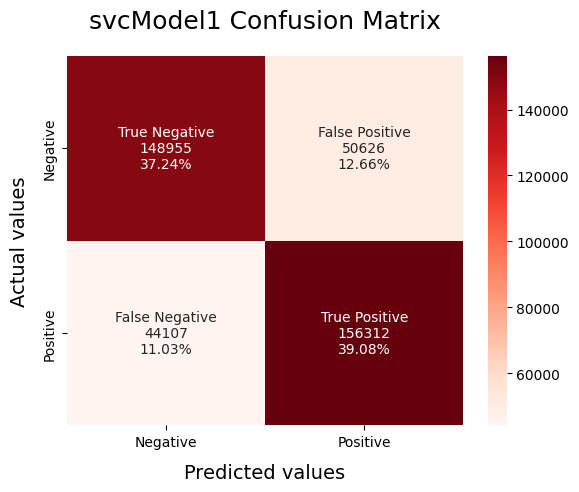

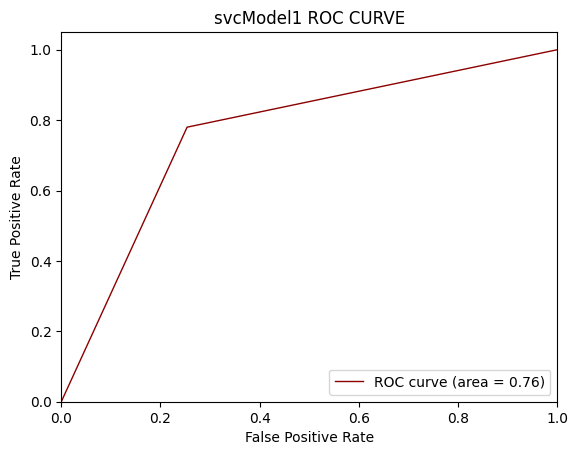

In [9]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.25, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel1", svcModel, X_test, Y_test)

showROCCurve("svcModel1", svcModel, X_test, Y_test)

**SVC Model 2**
changing test size to 0.2

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  340049
Data Transformed.
X_train shape:  (1280000, 340049)
X_test shape:  (320000, 340049)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



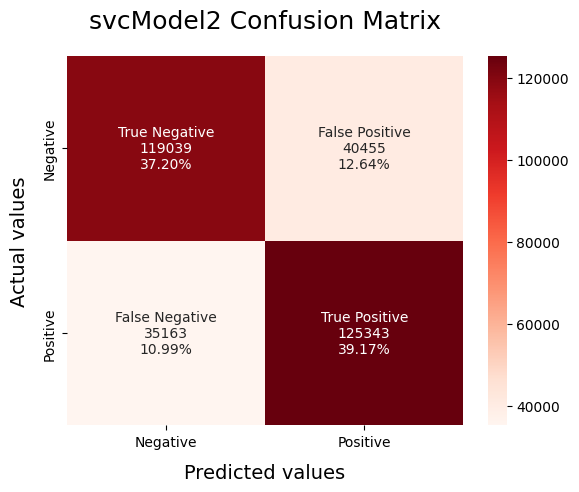

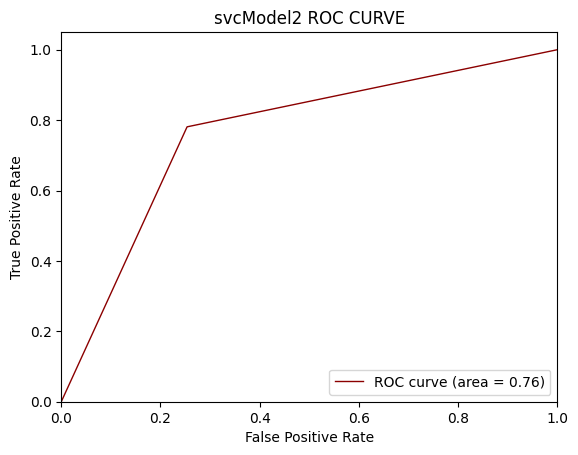

In [10]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel2", svcModel, X_test, Y_test)

showROCCurve("svcModel2", svcModel, X_test, Y_test)

**Model 3**
keeping test size 0.25
ngram range 1, 2


Train:  (1200000,) (1200000,) Test:  ((400000,), (400000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  500000
Data Transformed.
X_train shape:  (1200000, 500000)
X_test shape:  (400000, 500000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    199581
           1       0.76      0.78      0.77    200419

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



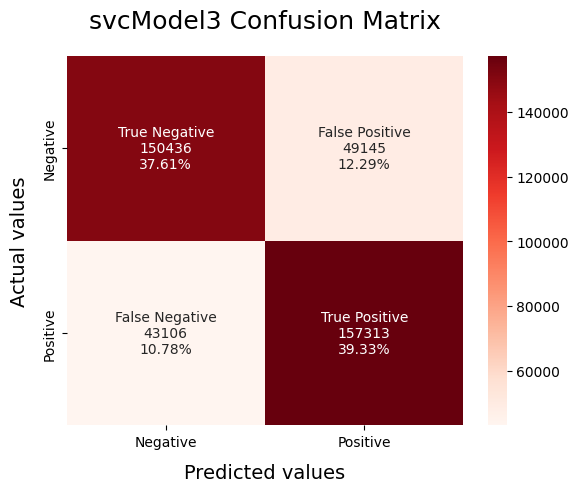

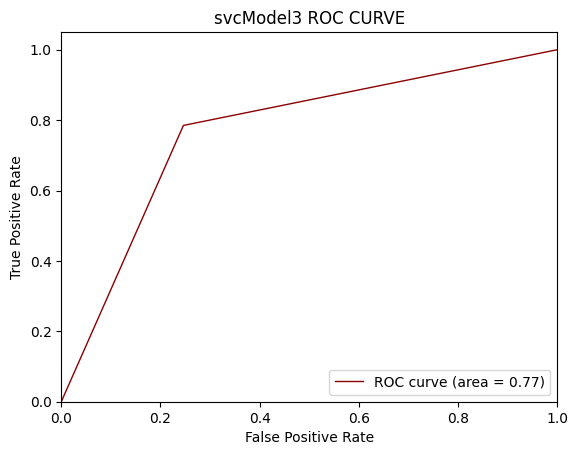

In [11]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.25, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel3", svcModel, X_test, Y_test)

showROCCurve("svcModel3", svcModel, X_test, Y_test)

**SVC Model 4**
ngram rane 2,2

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  500000
Data Transformed.
X_train shape:  (1280000, 500000)
X_test shape:  (320000, 500000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.74      0.64      0.69    159494
           1       0.68      0.78      0.73    160506

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000



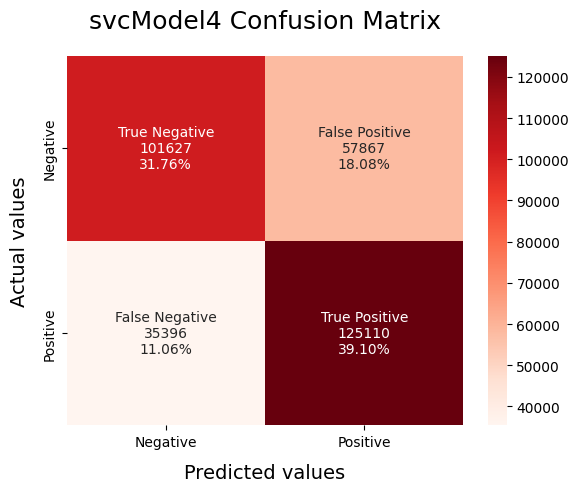

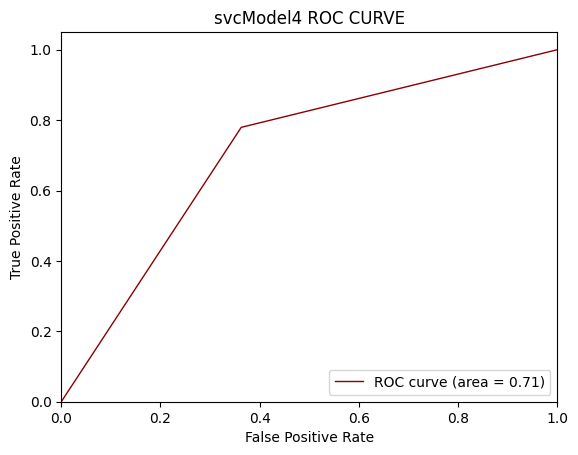

In [12]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(2,2), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel4", svcModel, X_test, Y_test)

showROCCurve("svcModel4", svcModel, X_test, Y_test)

**SVC model 5**
ngram_range 1,2
test_size 0.2


Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  500000
Data Transformed.
X_train shape:  (1280000, 500000)
X_test shape:  (320000, 500000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



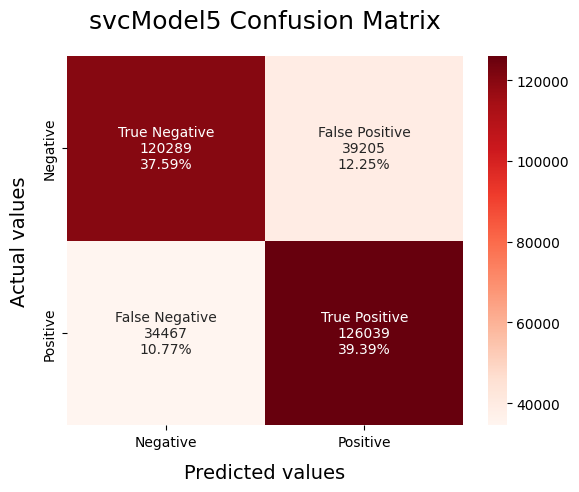

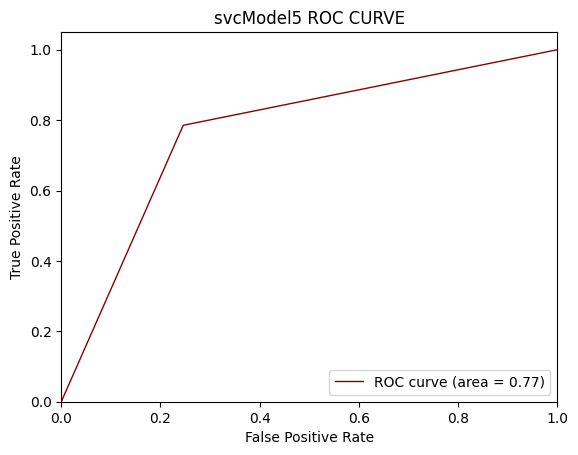

In [14]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel5", svcModel, X_test, Y_test)

showROCCurve("svcModel5", svcModel, X_test, Y_test)

**Model 6**
ngram_range = 1,2 test_size = 0.15

Train:  (1520000,) (1520000,) Test:  ((80000,), (80000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  500000
Data Transformed.
X_train shape:  (1520000, 500000)
X_test shape:  (80000, 500000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     39999
           1       0.76      0.79      0.77     40001

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000



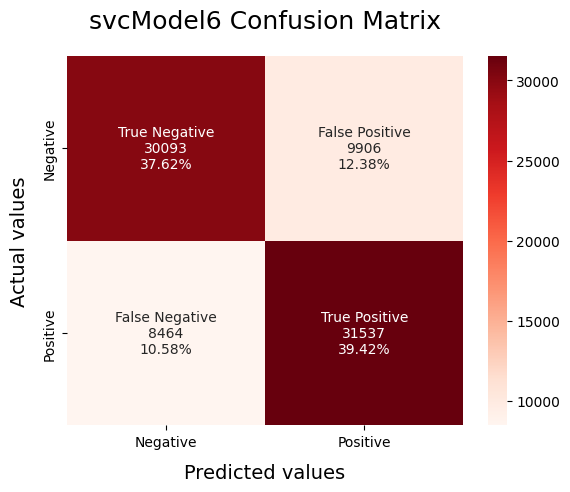

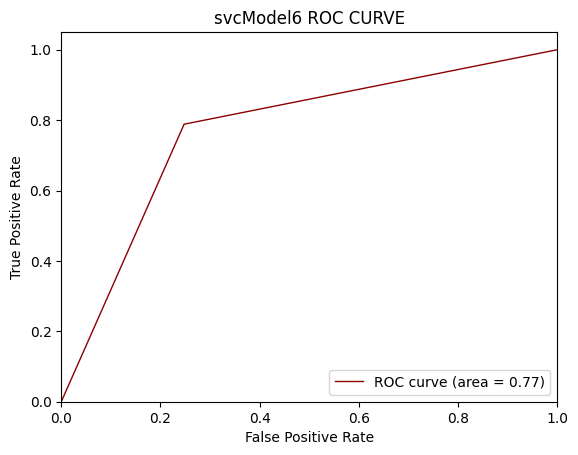

In [17]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.05, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# ngram_range required is tuple e.g. (1,1) or (1,2)
# ngram_range 1,1 means only unigrams are considered
# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel6", svcModel, X_test, Y_test)

showROCCurve("svcModel6", svcModel, X_test, Y_test)

**Model 7**
test_size = 0.2, ngram_range = 2,1, max_features = 800000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  800000
Data Transformed.
X_train shape:  (1280000, 800000)
X_test shape:  (320000, 800000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



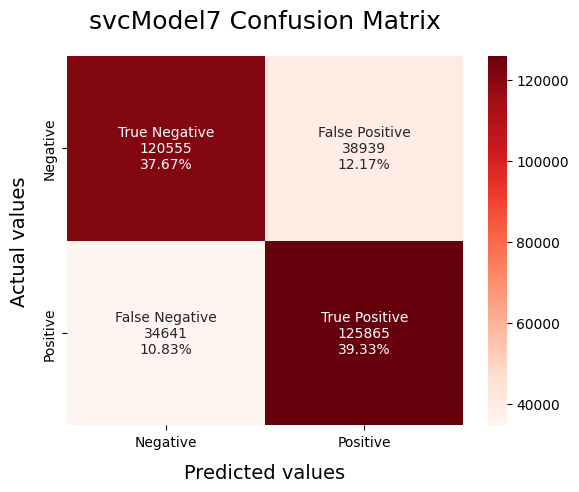

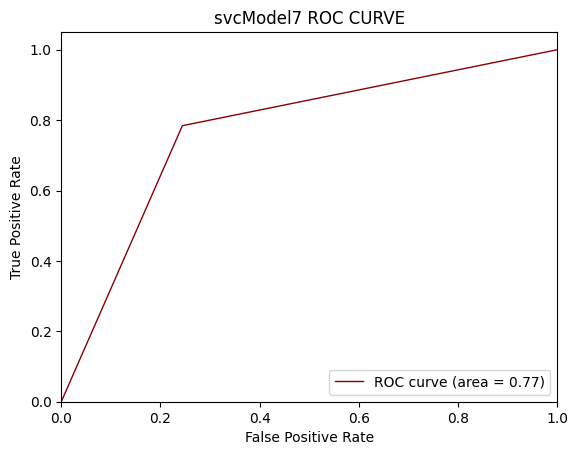

In [19]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=800000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel7", svcModel, X_test, Y_test)

showROCCurve("svcModel7", svcModel, X_test, Y_test)

**Model 8**
test_size = 0.2, ngram_range = 2,1, max_features = 300000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  300000
Data Transformed.
X_train shape:  (1280000, 300000)
X_test shape:  (320000, 300000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



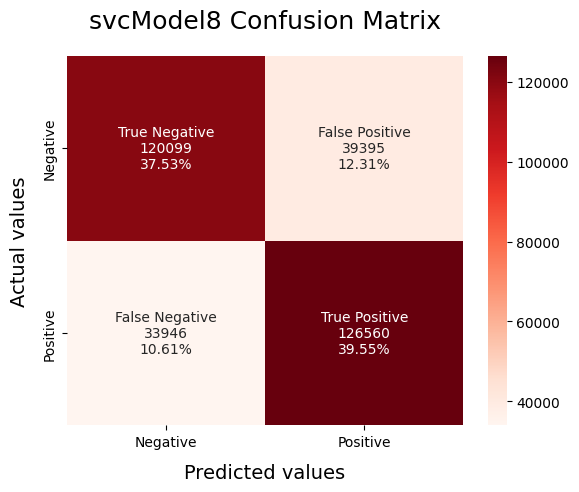

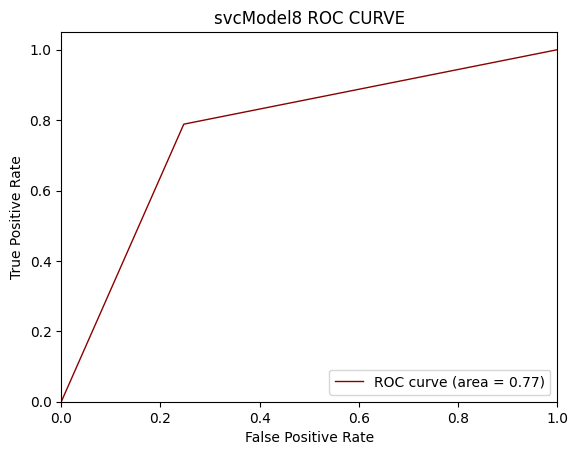

In [20]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=300000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel8", svcModel, X_test, Y_test)

showROCCurve("svcModel8", svcModel, X_test, Y_test)

**Model 9**
test_size = 0.2, ngram_range = 2,1, max_features = 200000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  200000
Data Transformed.
X_train shape:  (1280000, 200000)
X_test shape:  (320000, 200000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



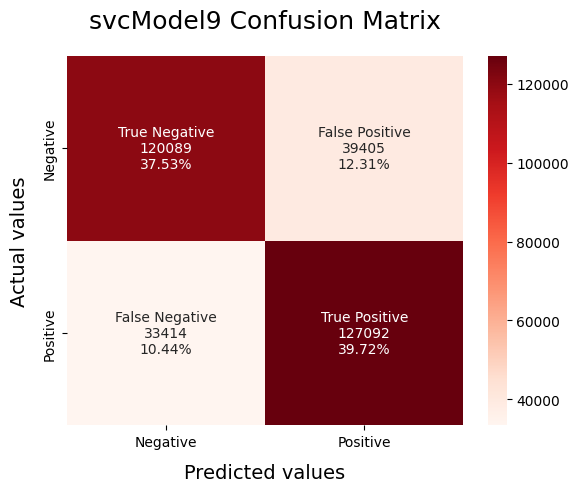

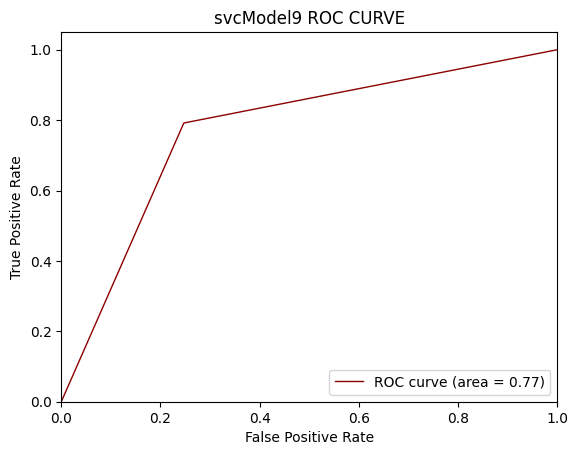

In [21]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=200000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel9", svcModel, X_test, Y_test)

showROCCurve("svcModel9", svcModel, X_test, Y_test)

**Model 10**
test_size = 0.2, ngram_range = 2,1, max_features = 100000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  100000
Data Transformed.
X_train shape:  (1280000, 100000)
X_test shape:  (320000, 100000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



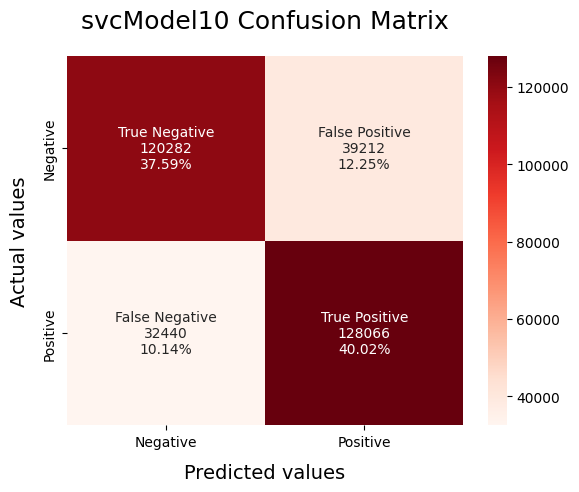

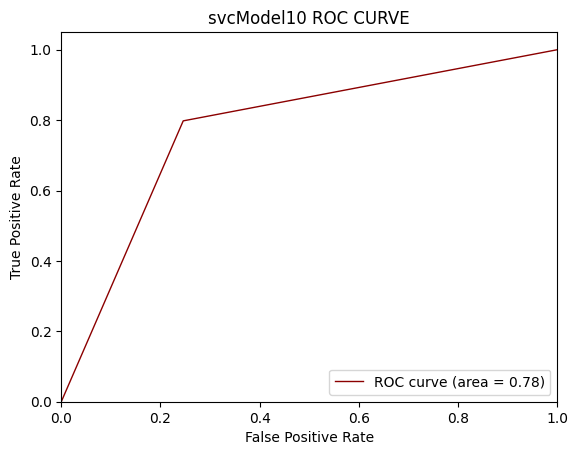

In [22]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel10", svcModel, X_test, Y_test)

showROCCurve("svcModel10", svcModel, X_test, Y_test)

**Model 11**
test_size = 0.2, ngram_range = 2,1, max_features = 50000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  50000
Data Transformed.
X_train shape:  (1280000, 50000)
X_test shape:  (320000, 50000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



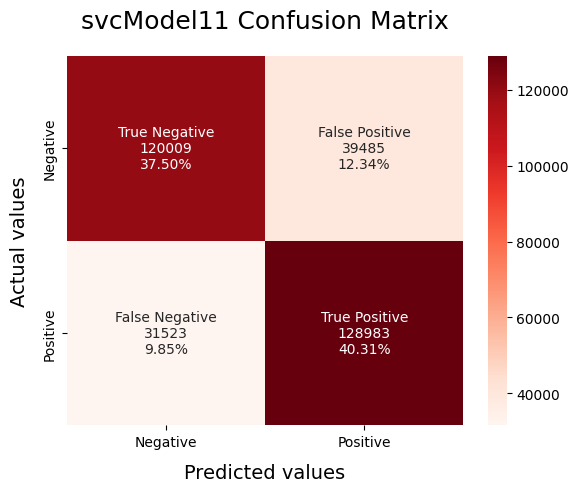

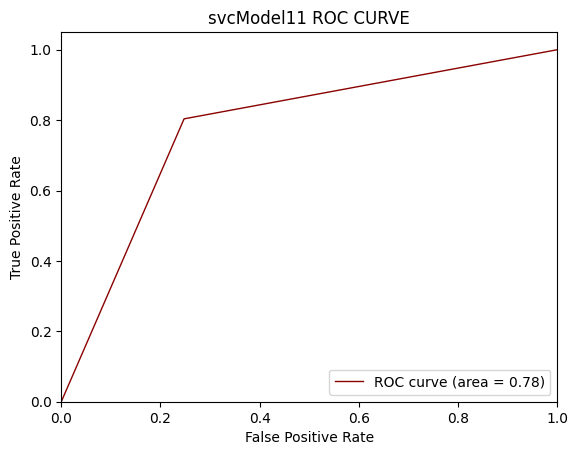

In [23]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel11", svcModel, X_test, Y_test)

showROCCurve("svcModel11", svcModel, X_test, Y_test)

**Model 12**
test_size = 0.2, ngram_range = 2,1, max_features = 25000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  25000
Data Transformed.
X_train shape:  (1280000, 25000)
X_test shape:  (320000, 25000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



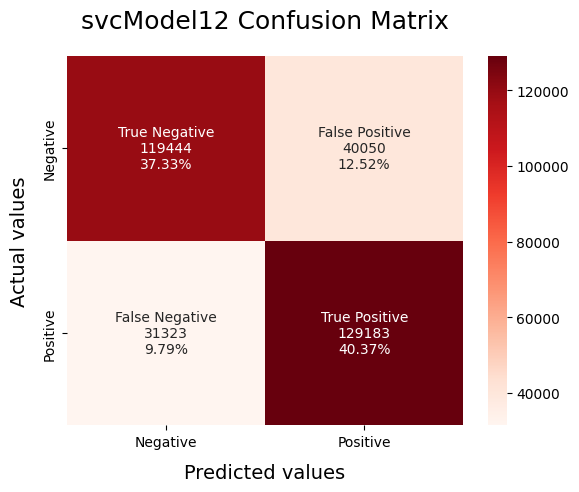

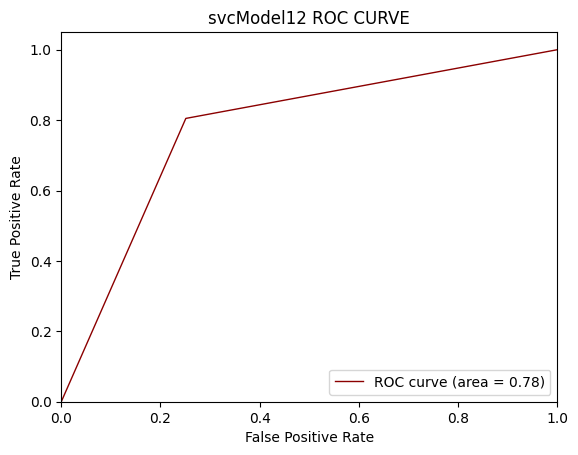

In [27]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=25000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel12", svcModel, X_test, Y_test)

showROCCurve("svcModel12", svcModel, X_test, Y_test)

**Model 13**
test_size = 0.2, ngram_range = 2,1, max_features = 10000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  10000
Data Transformed.
X_train shape:  (1280000, 10000)
X_test shape:  (320000, 10000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.79      0.74      0.76    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



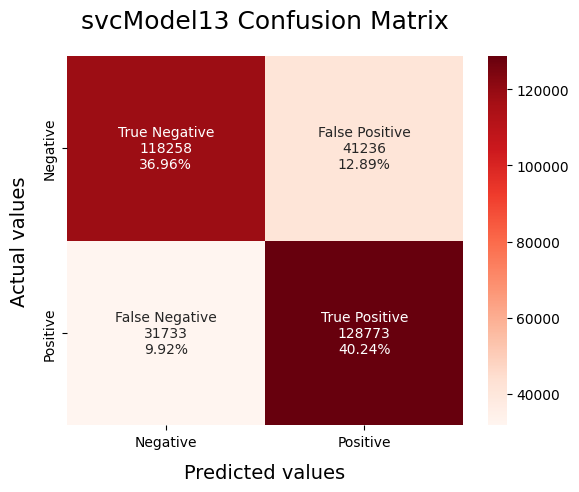

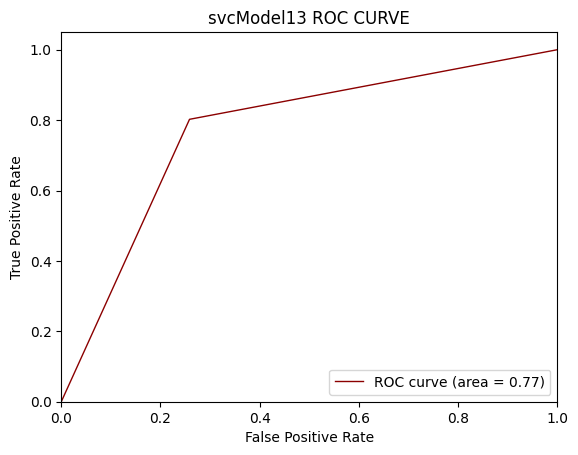

In [25]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel13", svcModel, X_test, Y_test)

showROCCurve("svcModel13", svcModel, X_test, Y_test)

**Model 14**
test_size = 0.2, ngram_range = 2,1, max_features = 5000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  5000
Data Transformed.
X_train shape:  (1280000, 5000)
X_test shape:  (320000, 5000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.78      0.73      0.76    159494
           1       0.75      0.80      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



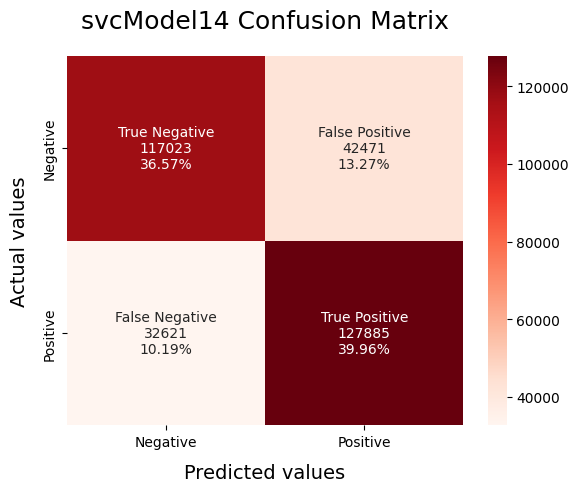

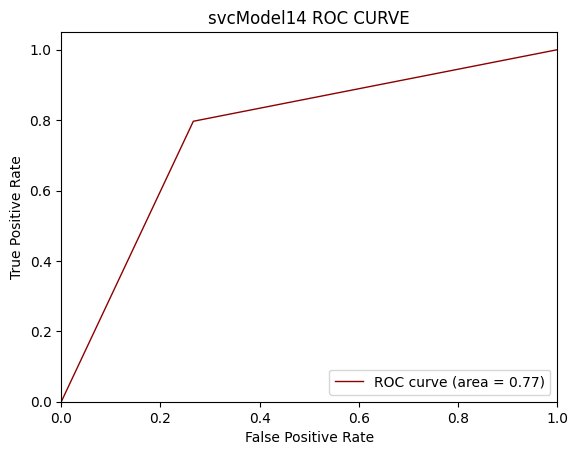

In [26]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel14", svcModel, X_test, Y_test)

showROCCurve("svcModel14", svcModel, X_test, Y_test)

**Model 15**
trained on cleanTweet data collumn (not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  100000
Data Transformed.
X_train shape:  (1280000, 100000)
X_test shape:  (320000, 100000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.82      0.80      0.81    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



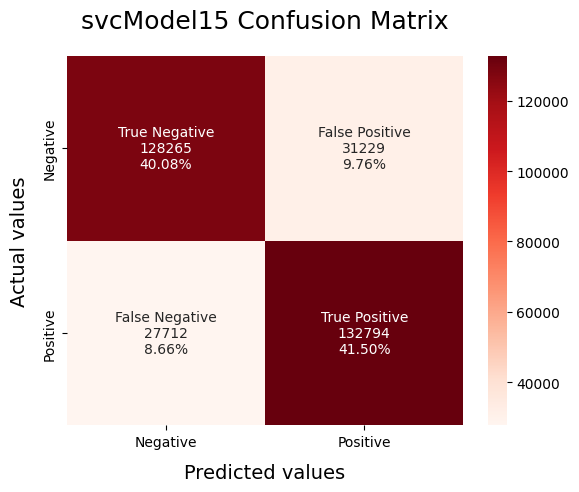

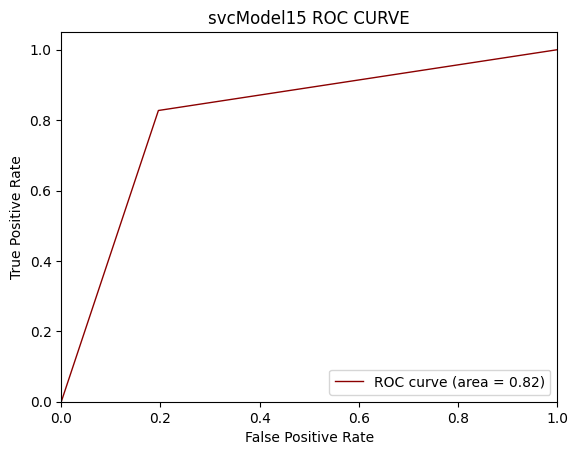

In [28]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["cleanTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel15", svcModel, X_test, Y_test)

showROCCurve("svcModel15", svcModel, X_test, Y_test)

**Model 16**
trained on cleanTweet data collumn (not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 500000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  500000
Data Transformed.
X_train shape:  (1280000, 500000)
X_test shape:  (320000, 500000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159494
           1       0.81      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



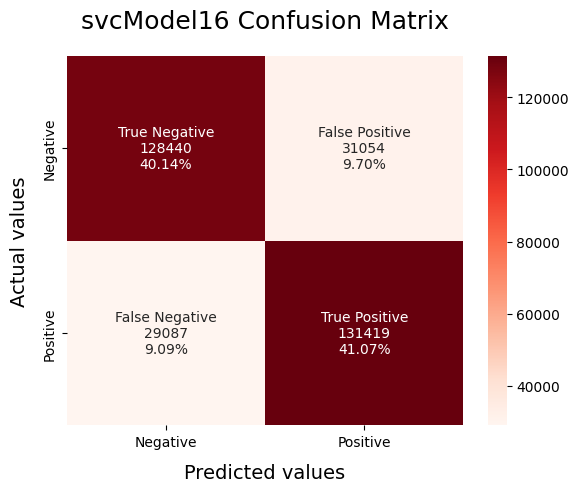

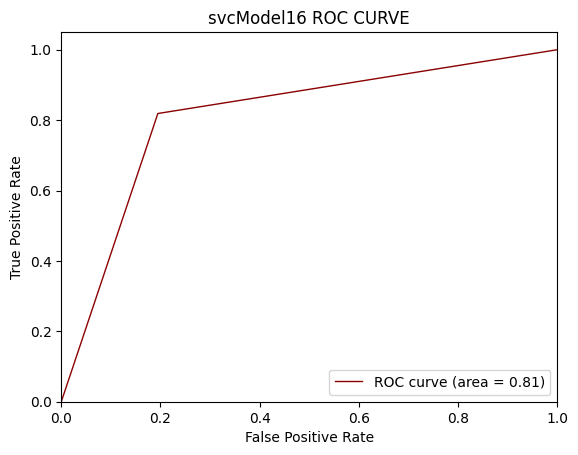

In [36]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["cleanTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel16", svcModel, X_test, Y_test)

showROCCurve("svcModel16", svcModel, X_test, Y_test)

**Model 17**
trained on unLemNoStops data collumn (no stopwords but not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  100000
Data Transformed.
X_train shape:  (1280000, 100000)
X_test shape:  (320000, 100000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           1       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



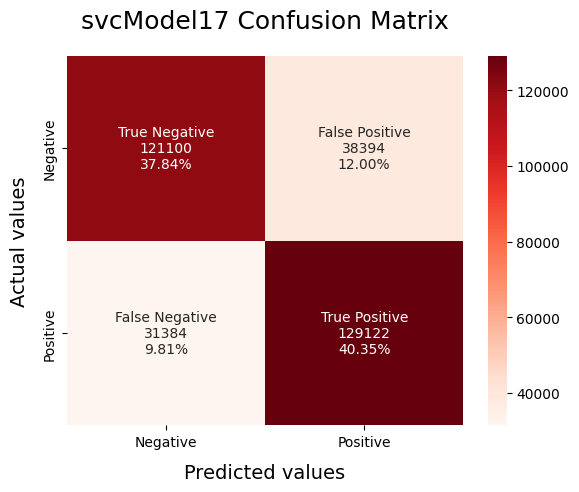

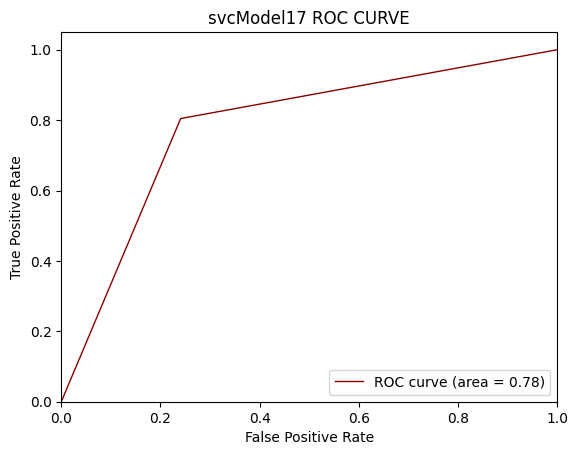

In [34]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["unLemNoStops"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel17", svcModel, X_test, Y_test)

showROCCurve("svcModel17", svcModel, X_test, Y_test)

**Model 18**
trained on tweet data collumn (original unprocessed tweet)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  100000
Data Transformed.
X_train shape:  (1280000, 100000)
X_test shape:  (320000, 100000)
Training SVM (LinearSVC) model
Model trained
              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



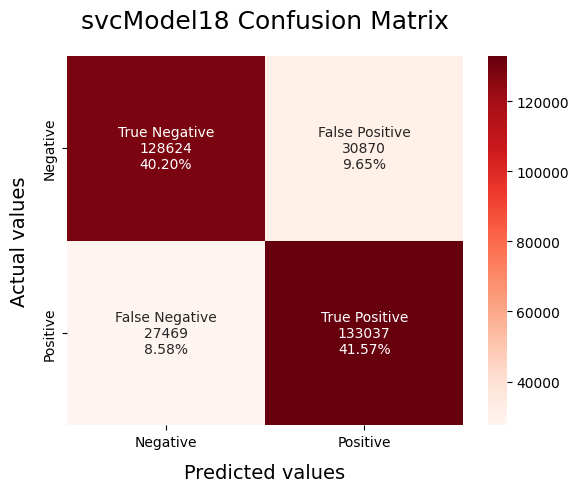

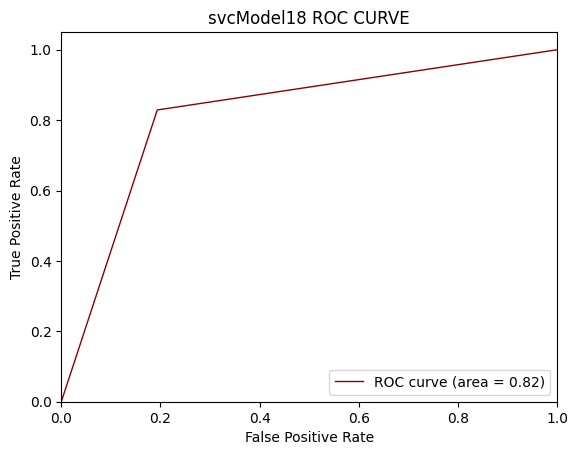

In [35]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["tweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel18", svcModel, X_test, Y_test)

showROCCurve("svcModel18", svcModel, X_test, Y_test)

**Model 19**
instead of TF-IDF using CountVectorizer
This was slow and 

Train:  (1280000,) (1280000,) Test:  ((320000,), (320000,))
Transforming Xtrain and Xtest data using TF-IDF
No. of feature_words:  3292625
Data Transformed.
X_train shape:  (1280000, 3292625)
X_test shape:  (320000, 3292625)
Training SVM (LinearSVC) model


c:\Users\olija\Documents\GitHub\CSCM20_Project\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model trained
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



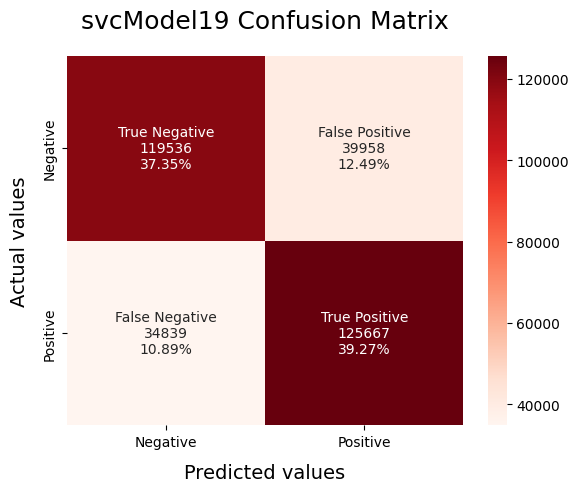

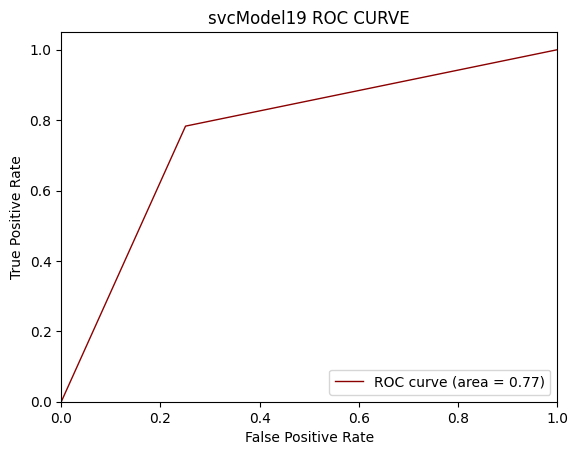

In [38]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["lemmatizedTweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

# using TF-IDF to vectorise training text
print("Transforming Xtrain and Xtest data using TF-IDF")
vectoriser = CountVectorizer(ngram_range=(1,2))
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print('Data Transformed.')
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Training SVM (LinearSVC) model")
svcModel = LinearSVC()
svcModel.fit(X_train, Y_train)
print("Model trained")

evaluateModel("svcModel19", svcModel, X_test, Y_test)

showROCCurve("svcModel19", svcModel, X_test, Y_test)